---

# Predicting Survival on the Titanic

## Introduction
hey guys i am **Ruby Poddar** The Titanic dataset is a classic in the field of data science, providing valuable insights into passenger demographics and survival outcomes from the tragic 1912 disaster. This project focuses on building machine learning models to predict passenger survival based on various attributes such as age, gender, ticket class, and more.

## Tools and Libraries
- **Tools**: Jupyter Notebook
- **Libraries**: Numpy , pandas , Matplotlib , scikit-learn , seaborn

## 1. Data Exploration and Preprocessing

### Data Loading
The dataset is initially loaded into memory using pandas, a powerful data analysis library in Python. This step allows us to inspect the structure and content of the dataset.

### Data Description
The Titanic dataset contains information on passengers, including:
- **PassengerId**: Unique identifier for each passenger
- **Pclass**: Ticket class (1st, 2nd, 3rd)
- **Name**: Passenger's name
- **Sex**: Passenger's gender
- **Age**: Passenger's age
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Survived**: Survival status (0 = No, 1 = Yes)

### Data Cleaning
Before analysis, the dataset undergoes cleaning to handle missing values and remove unnecessary columns. Missing values may be imputed or dropped based on the analysis of their impact on the model.

### Feature Engineering
Feature engineering involves creating new features or transforming existing ones to enhance predictive power. For instance, extracting titles (Mr., Mrs., etc.) from names can provide additional insights into social status.

### Exploratory Data Analysis (EDA)
EDA involves visualizing data distributions and relationships between variables. This step helps in understanding the dataset's characteristics and identifying patterns that may influence survival.

## 2. Model Training and Evaluation Workflow

### Data Preprocessing
Data preprocessing prepares the dataset for modeling by:
- Scaling numerical features to a standard range using StandardScaler.
- Encoding categorical features like 'Sex' and 'Embarked' using OneHotEncoder.

### Model Definition and Training
Multiple machine learning models are defined and trained using scikit-learn. For example, a RandomForestClassifier is trained to predict survival based on preprocessed features.

### Model Evaluation
Model performance is evaluated using various metrics:
- **Accuracy**: Overall correctness of predictions.
- **Precision**: Proportion of true positive predictions among all positive predictions.
- **Recall**: Proportion of true positive predictions among all actual positives.
- **Confusion Matrix**: Summarizes the performance of a classification model.

## 3. Results Interpretation

### Feature Importance
Analyzing feature importance helps in understanding which factors (e.g., age, gender, ticket class) most influence survival predictions. This insight guides further model refinement and feature selection.

### Model Comparison
Comparing the performance of different models (e.g., RandomForest, Logistic Regression) provides insights into their strengths and weaknesses. Factors such as computational efficiency and interpretability are considered.

## 4. Conclusion

### Summary
The project concludes with a summary of key findings, highlighting significant factors influencing passenger survival as predicted by the models.

### Recommendations
Based on the analysis, actionable recommendations are provided to improve model accuracy or explore additional data sources for more comprehensive analysis.

### Future Work
Future work outlines potential enhancements, such as exploring advanced modeling techniques (e.g., ensemble methods, deep learning) or integrating external datasets for richer insights.

## 5. References and Acknowledgments

### Data Source Citation
Acknowledging the source of the Titanic dataset ensures transparency and ethical use of data in research.

### Tools and Libraries
Listing tools and libraries used (e.g., Jupyter Notebook,Numpy , pandas, Matplotlib ,scikit-learn, Seaborn) acknowledges their role in facilitating the project's execution and reproducibility.

### Author
- **Author**: **Ruby Poddar**

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the CSV files
titanic_df = pd.read_csv("titanic.csv")
train_df = pd.read_csv("titanic_test.csv")

# Data Exploration

In [10]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
train_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [12]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


<Figure size 800x500 with 0 Axes>

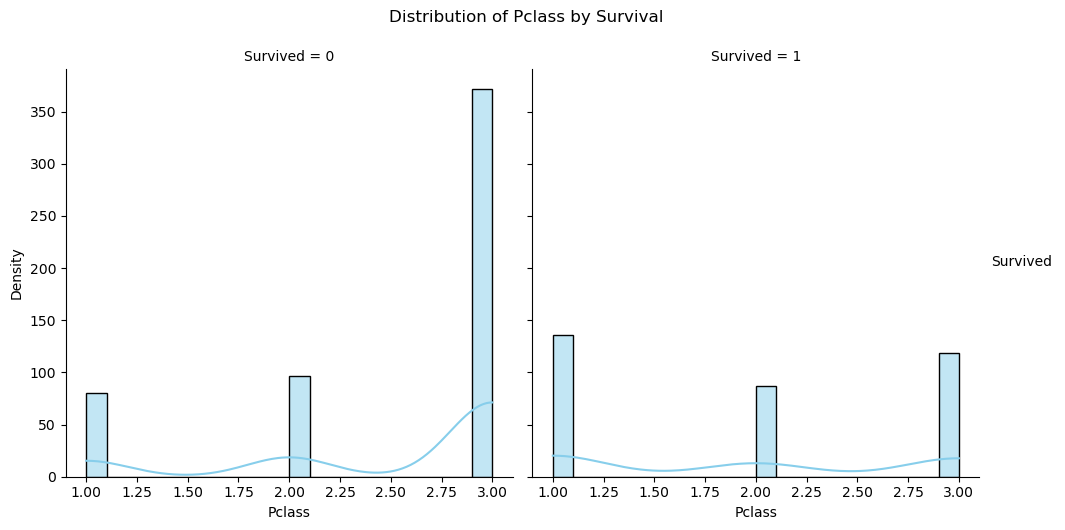

<Figure size 800x500 with 0 Axes>

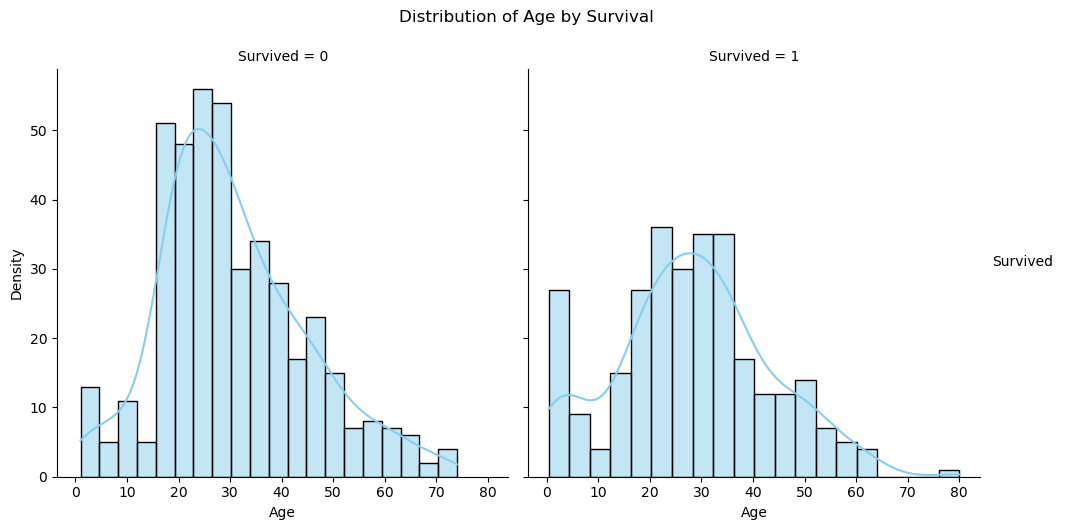

<Figure size 800x500 with 0 Axes>

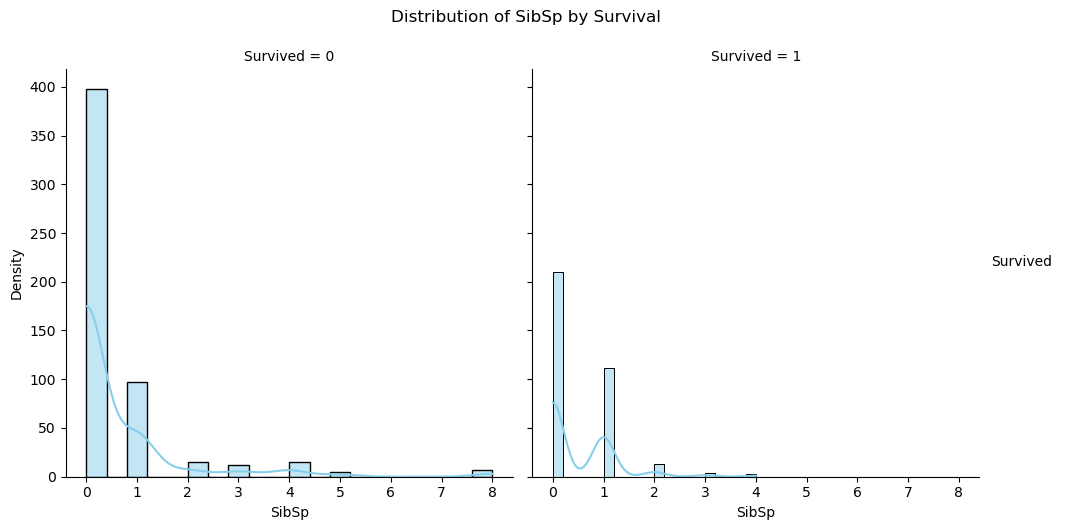

<Figure size 800x500 with 0 Axes>

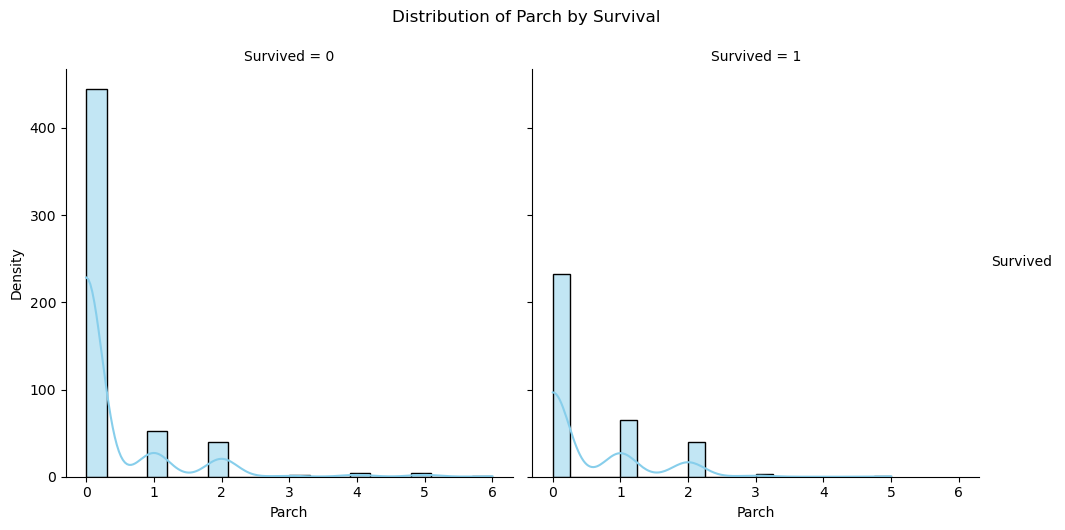

<Figure size 800x500 with 0 Axes>

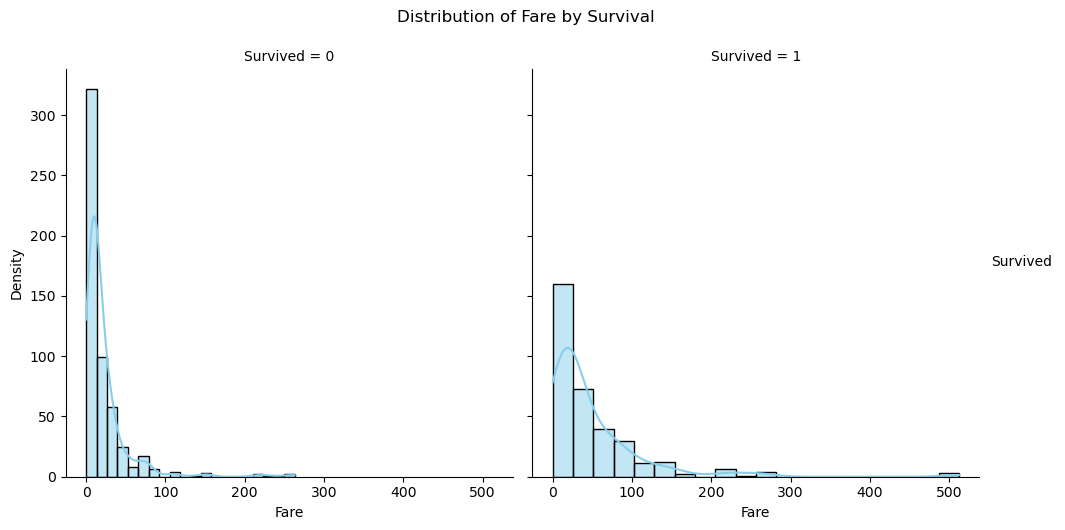

In [16]:
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    g = sns.FacetGrid(titanic_df, col="Survived", height=5)
    g.map_dataframe(sns.histplot, x=col, kde=True, bins=20, color='skyblue')
    g.set_axis_labels(col, 'Density')
    g.add_legend(title='Survived')
    plt.suptitle(f'Distribution of {col} by Survival', y=1.05)
    plt.show()


In [17]:
numeric_df = titanic_df.select_dtypes(include='number')

In [18]:
corr_matrix = numeric_df.corr()

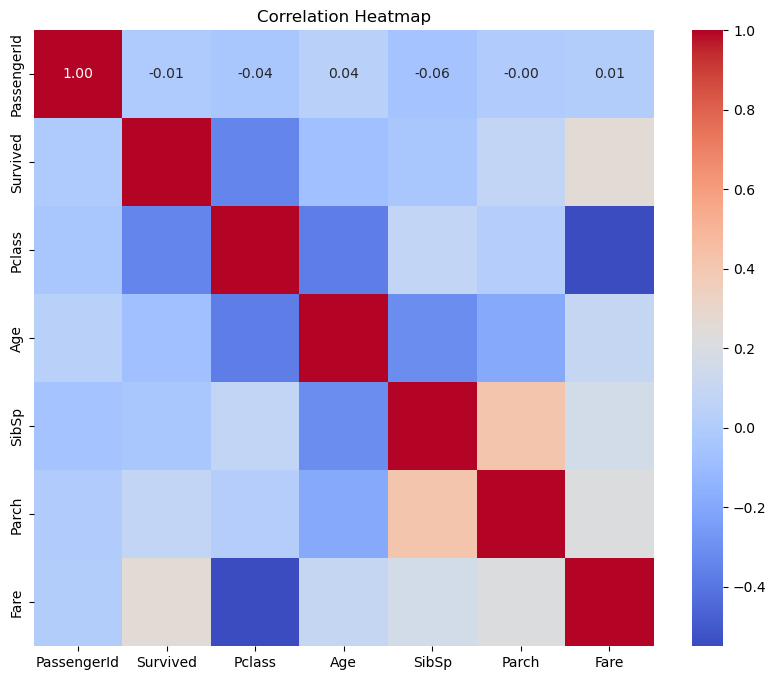

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [20]:
embarked_missing = titanic_df['Embarked'].isnull().sum()
embarked_missing

2

In [21]:
embarked_encoded = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked', drop_first=True)


In [22]:
encoded_df = pd.concat([titanic_df, embarked_encoded], axis=1)


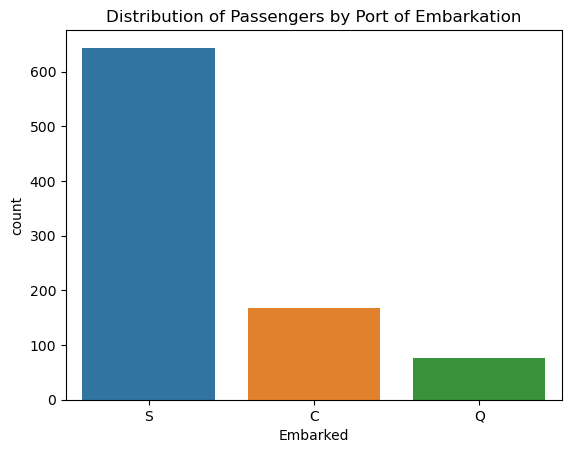

In [23]:
sns.countplot(x='Embarked', data=titanic_df)
plt.title('Distribution of Passengers by Port of Embarkation')
plt.show()

In [24]:
missing_age = titanic_df['Age'].isnull().sum()
missing_age

177

In [25]:
mean_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean_age, inplace=True)

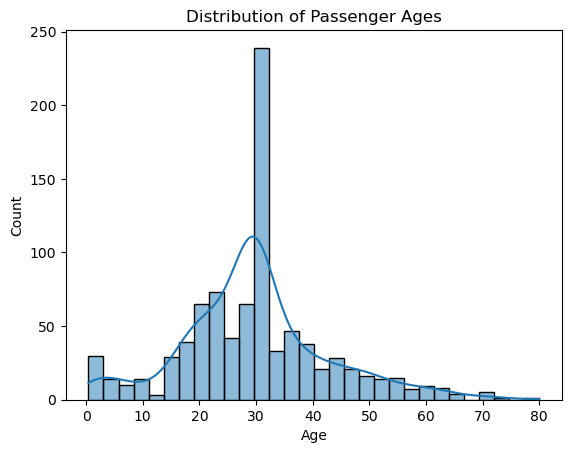

In [26]:
sns.histplot(data=titanic_df, x='Age', kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.show()

In [27]:
missing_cabin = titanic_df['Cabin'].isnull().sum
missing_cabin

<bound method Series.sum of 0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool>

In [28]:
titanic_df['Cabin'].fillna('Unknown', inplace=True)

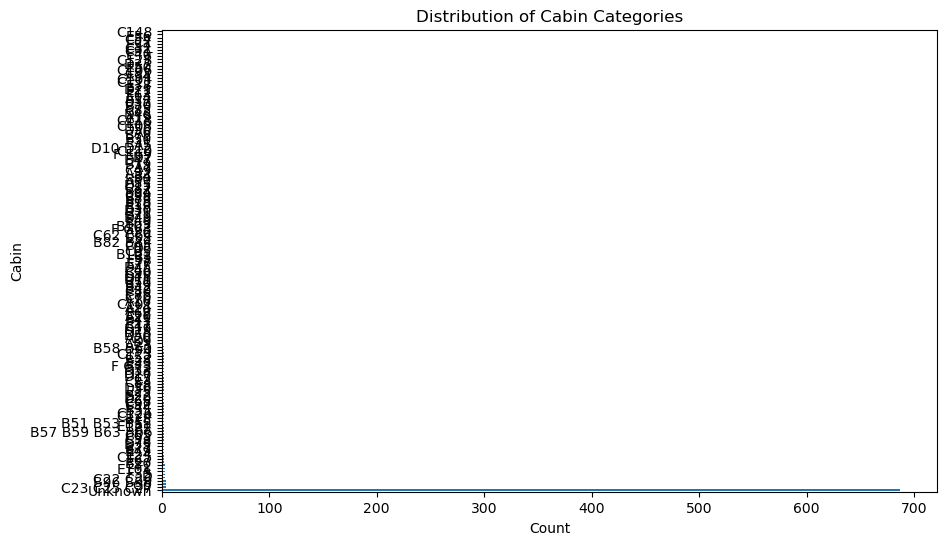

In [29]:
plt.figure(figsize=(10, 6))
cabin_counts = titanic_df['Cabin'].value_counts()
cabin_counts.plot(kind='barh')
plt.title('Distribution of Cabin Categories')
plt.xlabel('Count')
plt.ylabel('Cabin')
plt.show()

Text(0.5, 1.0, 'Passenger Class Distribution')

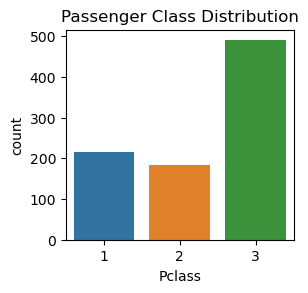

In [30]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
sns.countplot(data=titanic_df, x='Pclass')
plt.title('Passenger Class Distribution')

Text(0.5, 1.0, 'Sex Distribution')

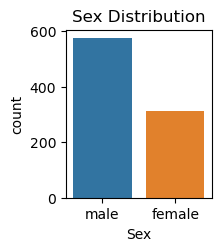

In [31]:
plt.subplot(2, 3, 2)
sns.countplot(data=titanic_df, x='Sex')
plt.title('Sex Distribution')

Text(0.5, 1.0, 'Age Distribution')

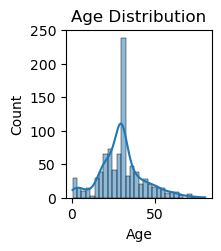

In [32]:
plt.subplot(2, 3, 3)
sns.histplot(data=titanic_df, x='Age', kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Siblings/Spouses Distribution')

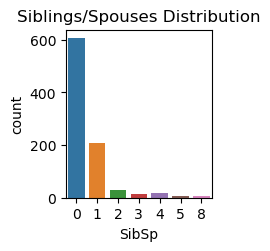

In [33]:
plt.subplot(2, 3, 4)
sns.countplot(data=titanic_df, x='SibSp')
plt.title('Siblings/Spouses Distribution')

Text(0.5, 1.0, 'Parents/Children Distribution')

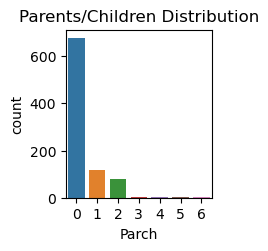

In [34]:
plt.subplot(2, 3, 5)
sns.countplot(data=titanic_df, x='Parch')
plt.title('Parents/Children Distribution')

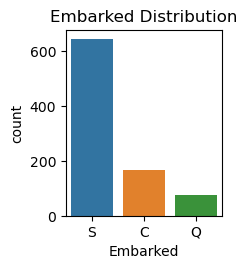

In [35]:
plt.subplot(2, 3, 6)
sns.countplot(data=titanic_df, x='Embarked')
plt.title('Embarked Distribution')

plt.tight_layout()
plt.show()

# pivot tables for categorical variables and compare them against the "Survived" column. 
Let's do this for the ***"Sex", "Pclass", and "Embarked" columns:***

In [36]:
sex_pivot = titanic_df.pivot_table(index='Sex', values='Survived', aggfunc=np.mean)
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


Text(0, 0.5, 'Survival Rate')

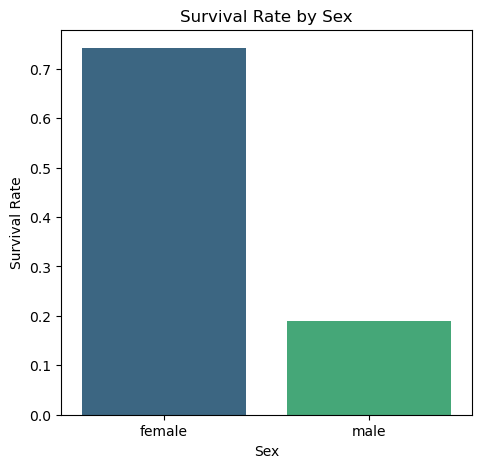

In [37]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=sex_pivot.index, y=sex_pivot['Survived'], palette='viridis')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

In [38]:
pclass_pivot = titanic_df.pivot_table(index='Pclass', values='Survived', aggfunc=np.mean)
pclass_pivot

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0, 0.5, 'Survival Rate')

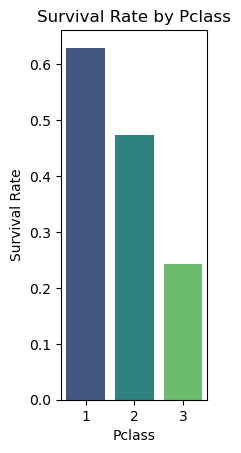

In [39]:
plt.subplot(1, 3, 2)
sns.barplot(x=pclass_pivot.index, y=pclass_pivot['Survived'], palette='viridis')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')


In [40]:
embarked_pivot = titanic_df.pivot_table(index='Embarked', values='Survived', aggfunc=np.mean)
embarked_pivot


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


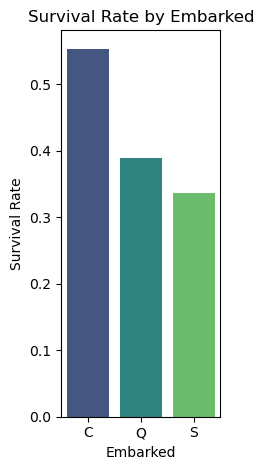

In [41]:
plt.subplot(1, 3, 3)
sns.barplot(x=embarked_pivot.index, y=embarked_pivot['Survived'], palette='viridis')
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

# Handling Missing Data

In [42]:
mean_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean_age, inplace=True)

In [43]:
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [44]:
titanic_df['Age'].fillna(mean_age, inplace=True)

In [45]:
titanic_df.dropna(subset=['Embarked'], inplace=True)

Visualize the impact of the handling strategy on the dataset.
Check if the distribution of variables has changed after handling missing data.

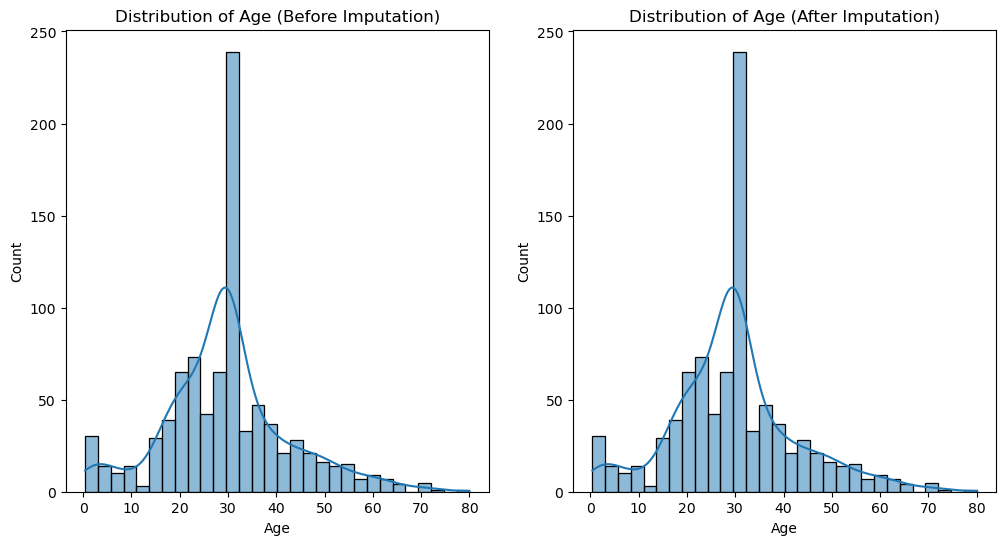

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=titanic_df, x='Age', kde=True)
plt.title('Distribution of Age (Before Imputation)')
plt.subplot(1, 2, 2)
sns.histplot(data=titanic_df, x='Age', kde=True)
plt.title('Distribution of Age (After Imputation)')
plt.show()

In [47]:
missing_values = titanic_df.isnull().sum()
missing_values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [48]:
missing_percentage = 0.1 

In [49]:
num_missing = int(len(titanic_df) * missing_percentage)

In [50]:
missing_indices = np.random.choice(titanic_df.index, num_missing, replace=False)

In [51]:
columns_with_missing = np.random.choice(titanic_df.columns, int(titanic_df.shape[1] * 0.5), replace=False)

In [52]:
titanic_df.loc[missing_indices, columns_with_missing] = np.nan

In [53]:
columns_with_missing = titanic_df.columns[titanic_df.isnull().any()].tolist()
columns_with_missing


['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Embarked']

In [54]:
median_age = titanic_df['Age'].median()
titanic_df['Age'].fillna(median_age, inplace=True)

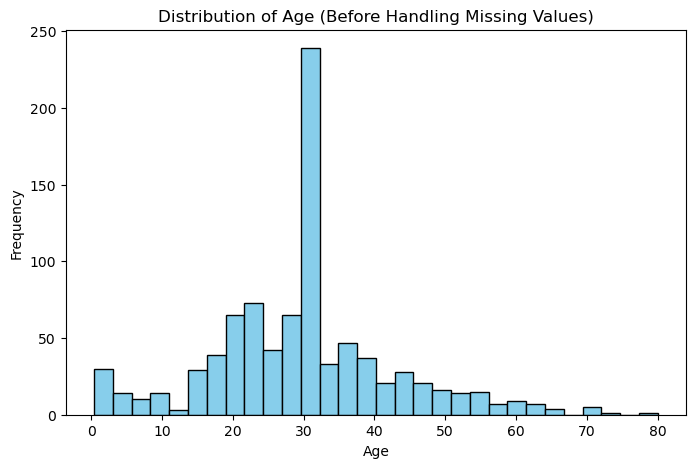

In [55]:
plt.figure(figsize=(8, 5))
plt.hist(titanic_df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age (Before Handling Missing Values)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


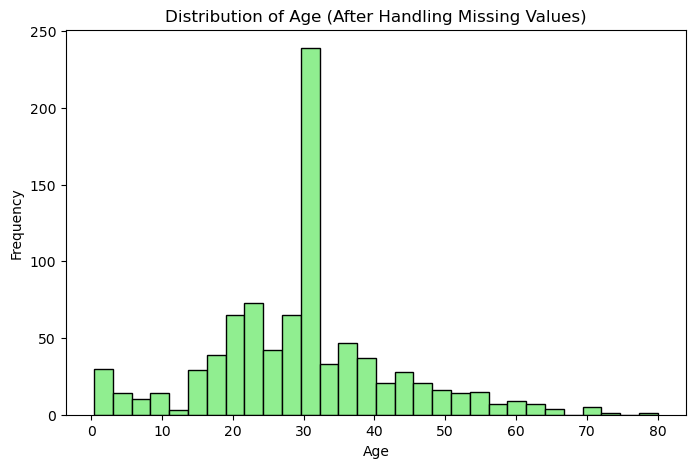

In [56]:
plt.figure(figsize=(8, 5))
plt.hist(titanic_df['Age'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Age (After Handling Missing Values)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [57]:
titanic_df['SibSp'].fillna(0, inplace=True)

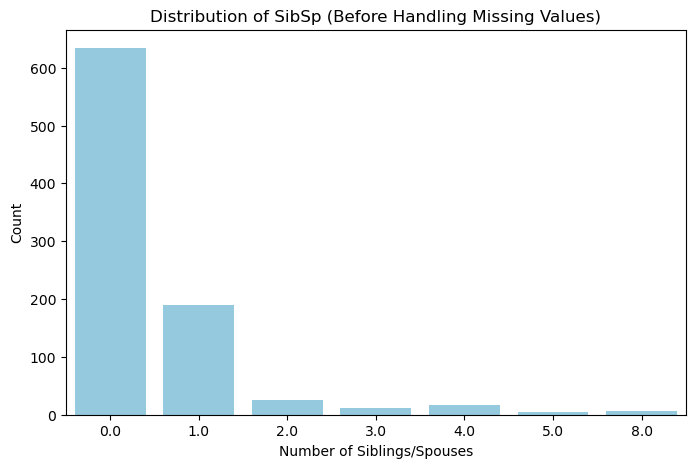

In [58]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='SibSp', color='skyblue')
plt.title('Distribution of SibSp (Before Handling Missing Values)')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

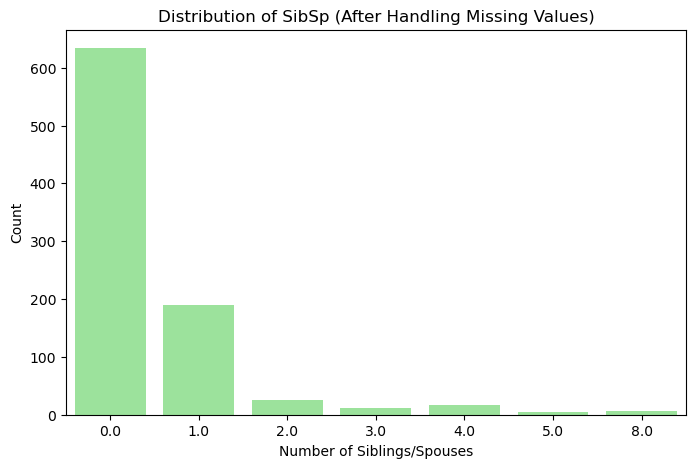

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='SibSp', color='lightgreen')
plt.title('Distribution of SibSp (After Handling Missing Values)')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

In [60]:
median_fare = titanic_df['Fare'].median()
titanic_df['Fare'].fillna(median_fare, inplace=True)


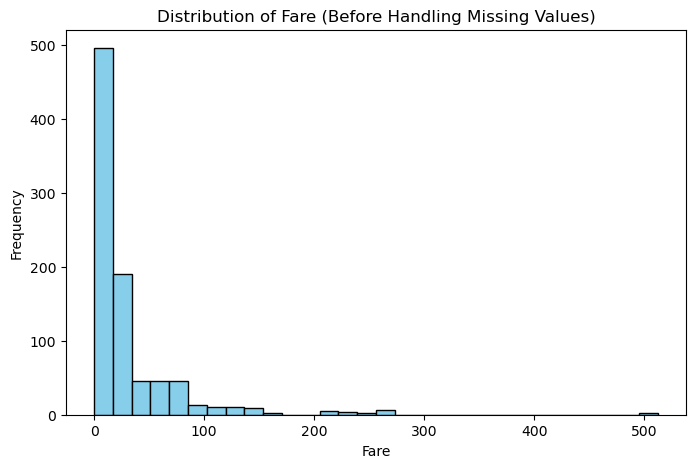

In [61]:
plt.figure(figsize=(8, 5))
plt.hist(titanic_df['Fare'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Fare (Before Handling Missing Values)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

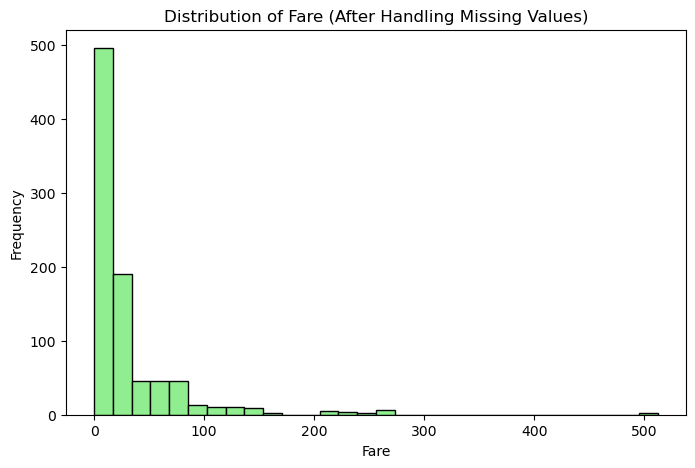

In [62]:
plt.figure(figsize=(8, 5))
plt.hist(titanic_df['Fare'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Fare (After Handling Missing Values)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [63]:
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(mode_embarked, inplace=True)

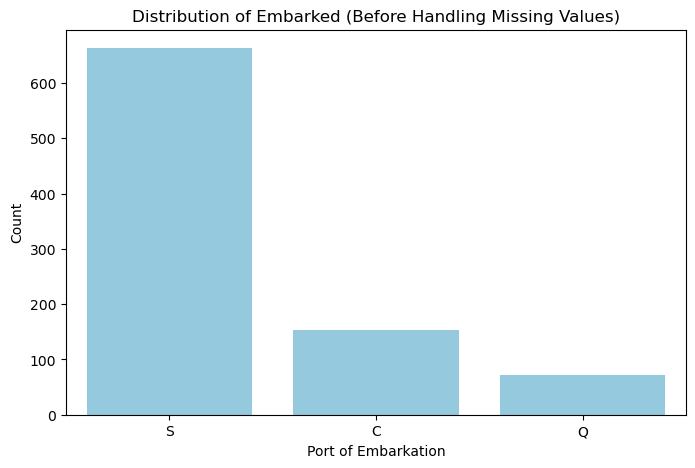

In [64]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='Embarked', color='skyblue')
plt.title('Distribution of Embarked (Before Handling Missing Values)')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

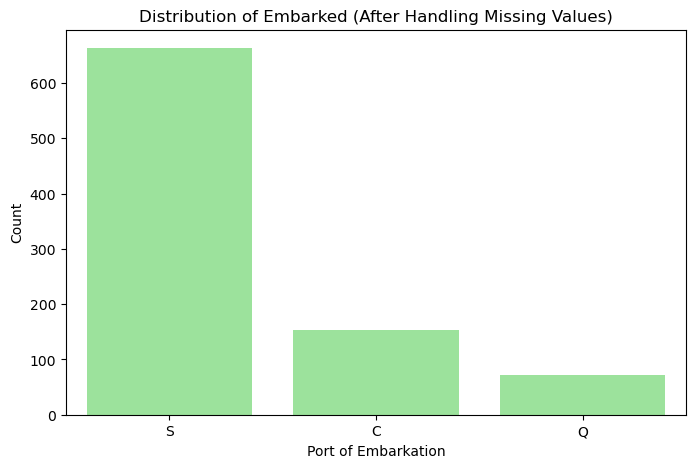

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='Embarked', color='lightgreen')
plt.title('Distribution of Embarked (After Handling Missing Values)')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

# Feature Engineering

## Title Extraction from Name:
Extract titles (e.g., Mr., Mrs., Miss) from the 'Name' column and create a new feature 'Title'.

In [66]:
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.000000,1.0,0,A/5 21171,7.2500,Unknown,S,Mr
1,NaN,NaN,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.000000,0.0,0,PC 17599,71.2833,C85,S,Mrs
2,NaN,NaN,NaN,"Heikkinen, Miss. Laina",NaN,26.000000,0.0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0,113803,53.1000,C123,S,Mrs
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.000000,0.0,0,373450,8.0500,Unknown,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.000000,0.0,0,211536,13.0000,Unknown,S,Rev
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0,112053,30.0000,B42,S,Miss
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,2,W./C. 6607,23.4500,Unknown,S,Miss
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.000000,0.0,0,111369,30.0000,C148,C,Mr


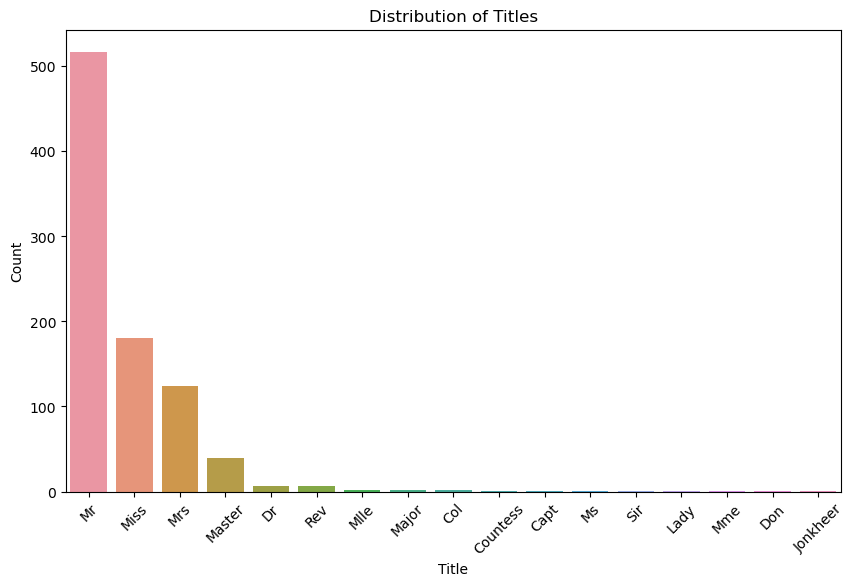

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='Title', order=titanic_df['Title'].value_counts().index)
plt.title('Distribution of Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Family Size: 
Create a new feature 'FamilySize' by adding 'SibSp' and 'Parch' columns.

In [68]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.000000,1.0,0,A/5 21171,7.2500,Unknown,S,Mr,1.0
1,NaN,NaN,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.000000,0.0,0,PC 17599,71.2833,C85,S,Mrs,0.0
2,NaN,NaN,NaN,"Heikkinen, Miss. Laina",NaN,26.000000,0.0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,0.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0,113803,53.1000,C123,S,Mrs,1.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.000000,0.0,0,373450,8.0500,Unknown,S,Mr,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.000000,0.0,0,211536,13.0000,Unknown,S,Rev,0.0
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0,112053,30.0000,B42,S,Miss,0.0
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,2,W./C. 6607,23.4500,Unknown,S,Miss,3.0
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.000000,0.0,0,111369,30.0000,C148,C,Mr,0.0


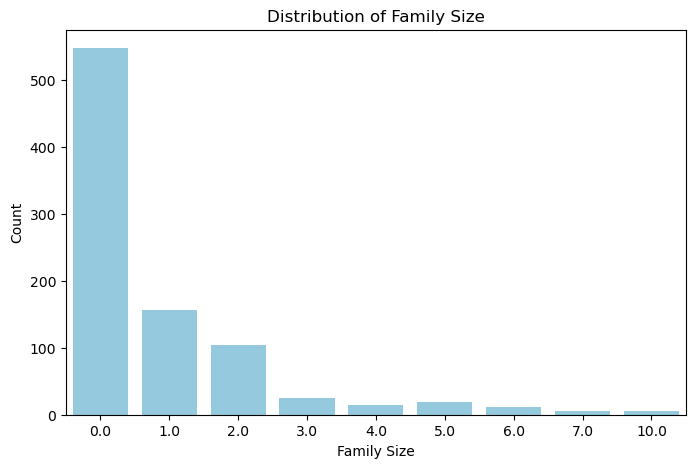

In [69]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='FamilySize', color='skyblue')
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

## Age Group: 
Create a new feature 'AgeGroup' by categorizing passengers into different age groups.

In [70]:
age_bins = [0, 18, 30, 50, 100]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']

In [71]:
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,AgeGroup
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.000000,1.0,0,A/5 21171,7.2500,Unknown,S,Mr,1.0,Young Adult
1,NaN,NaN,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.000000,0.0,0,PC 17599,71.2833,C85,S,Mrs,0.0,Adult
2,NaN,NaN,NaN,"Heikkinen, Miss. Laina",NaN,26.000000,0.0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,0.0,Young Adult
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0,113803,53.1000,C123,S,Mrs,1.0,Adult
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.000000,0.0,0,373450,8.0500,Unknown,S,Mr,0.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.000000,0.0,0,211536,13.0000,Unknown,S,Rev,0.0,Young Adult
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0,112053,30.0000,B42,S,Miss,0.0,Young Adult
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,2,W./C. 6607,23.4500,Unknown,S,Miss,3.0,Young Adult
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.000000,0.0,0,111369,30.0000,C148,C,Mr,0.0,Young Adult


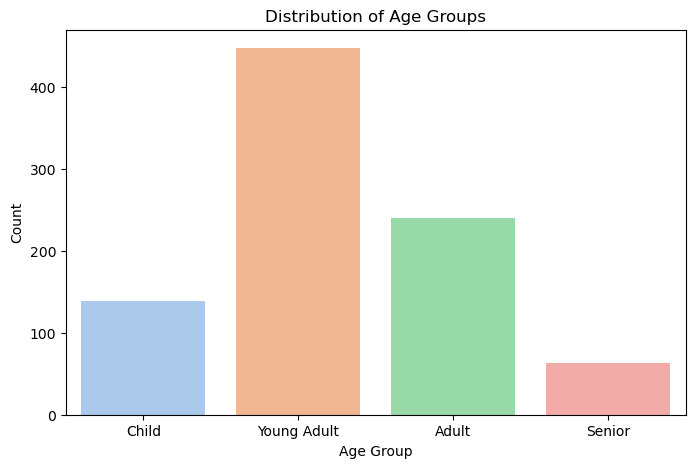

In [72]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='AgeGroup', order=age_labels, palette='pastel')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

## Fare Category: 
Create a new feature 'FareCategory' by categorizing passengers into different fare categories.

In [73]:
fare_bins = [0, 20, 40, 60, 80, 1000]
fare_labels = ['0-20', '20-40', '40-60', '60-80', '80+']

In [74]:
titanic_df['FareCategory'] = pd.cut(titanic_df['Fare'], bins=fare_bins, labels=fare_labels)

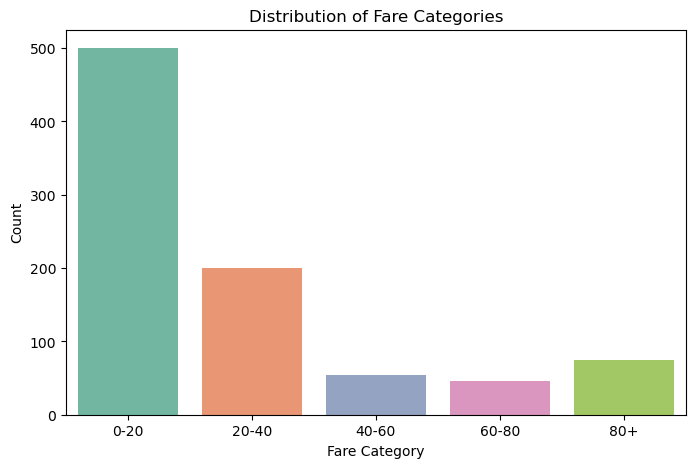

In [75]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='FareCategory', order=fare_labels, palette='Set2')
plt.title('Distribution of Fare Categories')
plt.xlabel('Fare Category')
plt.ylabel('Count')
plt.show()

# Advanced Feature Engineering

In [76]:
titanic_encoded = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked', 'Title', 'AgeGroup', 'FareCategory'], drop_first=True)
titanic_encoded

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Ms,Title_Rev,Title_Sir,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,FareCategory_20-40,FareCategory_40-60,FareCategory_60-80,FareCategory_80+
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",22.000000,1.0,0,A/5 21171,7.2500,Unknown,...,False,False,False,True,False,False,False,False,False,False
1,NaN,NaN,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,0.0,0,PC 17599,71.2833,C85,...,False,False,False,False,True,False,False,False,True,False
2,NaN,NaN,NaN,"Heikkinen, Miss. Laina",26.000000,0.0,0,STON/O2. 3101282,7.9250,Unknown,...,False,False,False,True,False,False,False,False,False,False
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1.0,0,113803,53.1000,C123,...,False,False,False,False,True,False,False,True,False,False
4,5.0,0.0,3.0,"Allen, Mr. William Henry",35.000000,0.0,0,373450,8.0500,Unknown,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",27.000000,0.0,0,211536,13.0000,Unknown,...,False,True,False,True,False,False,False,False,False,False
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",19.000000,0.0,0,112053,30.0000,B42,...,False,False,False,True,False,False,True,False,False,False
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1.0,2,W./C. 6607,23.4500,Unknown,...,False,False,False,True,False,False,True,False,False,False
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",26.000000,0.0,0,111369,30.0000,C148,...,False,False,False,True,False,False,True,False,False,False


## Feature Scaling:
Scale numerical features to ensure they have the same range.

In [96]:
numerical_features = titanic_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = titanic_df.select_dtypes(include=['object']).columns
numerical_features
categorical_features

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title'], dtype='object')

## Polynomial Features:
Generate polynomial features to capture nonlinear relationships.

In [100]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from itertools import combinations_with_replacement

In [101]:
numerical_features = titanic_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = titanic_df.select_dtypes(include=['object']).columns
numerical_features
categorical_features


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title'], dtype='object')

In [103]:
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer
categorical_transformer


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [106]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [108]:
titanic_transformed = preprocessor.fit_transform(titanic_df)
titanic_transformed


<889x1746 sparse matrix of type '<class 'numpy.float64'>'
	with 10068 stored elements in Compressed Sparse Row format>

In [109]:
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
categorical_feature_names


array(['Name_Abbing, Mr. Anthony', 'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)', ..., 'Title_Ms',
       'Title_Rev', 'Title_Sir'], dtype=object)

In [110]:
new_feature_names = list(numerical_features) + list(categorical_feature_names)
new_feature_names


['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'FamilySize',
 'Name_Abbing, Mr. Anthony',
 'Name_Abbott, Mr. Rossmore Edward',
 'Name_Abbott, Mrs. Stanton (Rosa Hunt)',
 'Name_Abelson, Mr. Samuel',
 'Name_Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Name_Adahl, Mr. Mauritz Nils Martin',
 'Name_Adams, Mr. John',
 'Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Name_Aks, Mrs. Sam (Leah Rosen)',
 'Name_Albimona, Mr. Nassef Cassem',
 'Name_Alexander, Mr. William',
 'Name_Alhomaki, Mr. Ilmari Rudolf',
 'Name_Ali, Mr. Ahmed',
 'Name_Ali, Mr. William',
 'Name_Allen, Miss. Elisabeth Walton',
 'Name_Allen, Mr. William Henry',
 'Name_Allison, Master. Hudson Trevor',
 'Name_Allison, Miss. Helen Loraine',
 'Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
 'Name_Allum, Mr. Owen George',
 'Name_Andersen-Jensen, Miss. Carla Christine Nielsine',
 'Name_Anderson, Mr. Harry',
 'Name_Andersson, Master. Sigvard Harald Elias',
 'Name_Andersson, Miss. Ebba Iris Al

In [113]:
titanic_transformed.shape


(889, 1746)

In [114]:
len(new_feature_names)

1746

###  Single Column Data with Multiple Column Names

In [116]:
new_feature_names = new_feature_names[:1]
new_feature_names

['PassengerId']

In [117]:
titanic_transformed_df = pd.DataFrame(titanic_transformed, columns=new_feature_names)
print(titanic_transformed_df)
titanic_transformed_df


                                           PassengerId
0      (0, 0)\t1.0\n  (0, 2)\t3.0\n  (0, 3)\t22.0\n...
1      (0, 0)\t451.0249687890137\n  (0, 1)\t0.36953...
2      (0, 0)\t451.0249687890137\n  (0, 1)\t0.36953...
3      (0, 0)\t4.0\n  (0, 1)\t1.0\n  (0, 2)\t1.0\n ...
4      (0, 0)\t5.0\n  (0, 2)\t3.0\n  (0, 3)\t35.0\n...
..                                                 ...
884    (0, 0)\t887.0\n  (0, 2)\t2.0\n  (0, 3)\t27.0...
885    (0, 0)\t888.0\n  (0, 1)\t1.0\n  (0, 2)\t1.0\...
886    (0, 0)\t889.0\n  (0, 2)\t3.0\n  (0, 3)\t29.6...
887    (0, 0)\t890.0\n  (0, 1)\t1.0\n  (0, 2)\t1.0\...
888    (0, 0)\t891.0\n  (0, 2)\t3.0\n  (0, 3)\t32.0...

[889 rows x 1 columns]


,PassengerId
0,"(0, 0)\t1.0\n (0, 2)\t3.0\n (0, 3)\t22.0\n..."
1,"(0, 0)\t451.0249687890137\n (0, 1)\t0.36953..."
2,"(0, 0)\t451.0249687890137\n (0, 1)\t0.36953..."
3,"(0, 0)\t4.0\n (0, 1)\t1.0\n (0, 2)\t1.0\n ..."
4,"(0, 0)\t5.0\n (0, 2)\t3.0\n (0, 3)\t35.0\n..."
...,...
884,"(0, 0)\t887.0\n (0, 2)\t2.0\n (0, 3)\t27.0..."
885,"(0, 0)\t888.0\n (0, 1)\t1.0\n (0, 2)\t1.0\..."
886,"(0, 0)\t889.0\n (0, 2)\t3.0\n (0, 3)\t29.6..."
887,"(0, 0)\t890.0\n (0, 1)\t1.0\n (0, 2)\t1.0\..."


In [119]:
if titanic_transformed.shape[1] != len(new_feature_names):
    new_feature_names = new_feature_names[:titanic_transformed.shape[1]]
new_feature_names
    

['PassengerId']

In [121]:
titanic_transformed_df.columns

Index(['PassengerId'], dtype='object')

In [130]:
titanic_transformed = titanic_df.copy()

In [126]:
 titanic_transformed.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'AgeGroup', 'FareCategory'],
      dtype='object')

In [129]:
titanic_transformed_df = titanic_transformed.copy()

In [131]:
titanic_transformed_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'AgeGroup', 'FareCategory'],
      dtype='object')

In [132]:
numerical_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']

In [133]:
titanic_selected = titanic_df[numerical_features].copy()

In [134]:
 titanic_selected.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize'], dtype='object')

In [135]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(titanic_selected)

ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### The error message indicates that  input data titanic_selected contains missing values (NaN), which PolynomialFeatures cannot handle directly. To proceed,few options to handle missing values before applying PolynomialFeatures:

**Impute Missing Values**: Use an imputation strategy to fill in missing values with meaningful substitutes (e.g., mean, median, or a more advanced imputation method like KNN imputation).

**Drop Missing Values**: Remove rows with missing values from your dataset if feasible.

In [136]:
from sklearn.impute import SimpleImputer


Create an imputer object with a strategy to impute missing values 

In [137]:
imputer = SimpleImputer(strategy='mean')
imputer

SimpleImputer()

In [138]:
titanic_selected_imputed = imputer.fit_transform(titanic_selected)
titanic_selected_imputed 


array([[ 0.        ,  3.        , 22.        , ...,  0.        ,
         7.25      ,  1.        ],
       [ 0.36953808,  2.30212235, 38.        , ...,  0.        ,
        71.2833    ,  0.        ],
       [ 0.36953808,  2.30212235, 26.        , ...,  0.        ,
         7.925     ,  0.        ],
       ...,
       [ 0.        ,  3.        , 29.69911765, ...,  2.        ,
        23.45      ,  3.        ],
       [ 1.        ,  1.        , 26.        , ...,  0.        ,
        30.        ,  0.        ],
       [ 0.        ,  3.        , 32.        , ...,  0.        ,
         7.75      ,  0.        ]])

In [139]:
titanic_selected_imputed_df = pd.DataFrame(titanic_selected_imputed, columns=titanic_selected.columns)
titanic_selected_imputed_df


,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
0,0.000000,3.000000,22.000000,1.0,0.0,7.2500,1.0
1,0.369538,2.302122,38.000000,0.0,0.0,71.2833,0.0
2,0.369538,2.302122,26.000000,0.0,0.0,7.9250,0.0
3,1.000000,1.000000,35.000000,1.0,0.0,53.1000,1.0
4,0.000000,3.000000,35.000000,0.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...
884,0.000000,2.000000,27.000000,0.0,0.0,13.0000,0.0
885,1.000000,1.000000,19.000000,0.0,0.0,30.0000,0.0
886,0.000000,3.000000,29.699118,1.0,2.0,23.4500,3.0
887,1.000000,1.000000,26.000000,0.0,0.0,30.0000,0.0


Convert the transformed data back to a DataFrame

In [141]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(titanic_selected_imputed_df)
poly
poly_features


array([[0.00000000e+00, 3.00000000e+00, 2.20000000e+01, ...,
        5.25625000e+01, 7.25000000e+00, 1.00000000e+00],
       [3.69538077e-01, 2.30212235e+00, 3.80000000e+01, ...,
        5.08130886e+03, 0.00000000e+00, 0.00000000e+00],
       [3.69538077e-01, 2.30212235e+00, 2.60000000e+01, ...,
        6.28056250e+01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.00000000e+00, 2.96991176e+01, ...,
        5.49902500e+02, 7.03500000e+01, 9.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 2.60000000e+01, ...,
        9.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.00000000e+00, 3.20000000e+01, ...,
        6.00625000e+01, 0.00000000e+00, 0.00000000e+00]])

In [155]:
poly_feature_names = poly.get_feature_names_out(input_features=numerical_features)
poly_feature_names



array(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'Survived^2', 'Survived Pclass', 'Survived Age',
       'Survived SibSp', 'Survived Parch', 'Survived Fare',
       'Survived FamilySize', 'Pclass^2', 'Pclass Age', 'Pclass SibSp',
       'Pclass Parch', 'Pclass Fare', 'Pclass FamilySize', 'Age^2',
       'Age SibSp', 'Age Parch', 'Age Fare', 'Age FamilySize', 'SibSp^2',
       'SibSp Parch', 'SibSp Fare', 'SibSp FamilySize', 'Parch^2',
       'Parch Fare', 'Parch FamilySize', 'Fare^2', 'Fare FamilySize',
       'FamilySize^2'], dtype=object)

In [157]:
poly_features_df = pd.DataFrame(poly_features, columns=poly_feature_names)
poly_features_df



,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Survived^2,Survived Pclass,Survived Age,...,SibSp^2,SibSp Parch,SibSp Fare,SibSp FamilySize,Parch^2,Parch Fare,Parch FamilySize,Fare^2,Fare FamilySize,FamilySize^2
0,0.000000,3.000000,22.000000,1.0,0.0,7.2500,1.0,0.000000,0.000000,0.000000,...,1.0,0.0,7.25,1.0,0.0,0.0,0.0,52.562500,7.25,1.0
1,0.369538,2.302122,38.000000,0.0,0.0,71.2833,0.0,0.136558,0.850722,14.042447,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,5081.308859,0.00,0.0
2,0.369538,2.302122,26.000000,0.0,0.0,7.9250,0.0,0.136558,0.850722,9.607990,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,62.805625,0.00,0.0
3,1.000000,1.000000,35.000000,1.0,0.0,53.1000,1.0,1.000000,1.000000,35.000000,...,1.0,0.0,53.10,1.0,0.0,0.0,0.0,2819.610000,53.10,1.0
4,0.000000,3.000000,35.000000,0.0,0.0,8.0500,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,64.802500,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.000000,2.000000,27.000000,0.0,0.0,13.0000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,169.000000,0.00,0.0
885,1.000000,1.000000,19.000000,0.0,0.0,30.0000,0.0,1.000000,1.000000,19.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,900.000000,0.00,0.0
886,0.000000,3.000000,29.699118,1.0,2.0,23.4500,3.0,0.000000,0.000000,0.000000,...,1.0,2.0,23.45,3.0,4.0,46.9,6.0,549.902500,70.35,9.0
887,1.000000,1.000000,26.000000,0.0,0.0,30.0000,0.0,1.000000,1.000000,26.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,900.000000,0.00,0.0


In [158]:
poly_features_df.shape

(889, 35)

In [160]:
poly_features_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Survived^2,Survived Pclass,Survived Age,...,SibSp^2,SibSp Parch,SibSp Fare,SibSp FamilySize,Parch^2,Parch Fare,Parch FamilySize,Fare^2,Fare FamilySize,FamilySize^2
0,0.000000,3.000000,22.000000,1.0,0.0,7.2500,1.0,0.000000,0.000000,0.000000,...,1.0,0.0,7.2500,1.0,0.0,0.0000,0.0,52.562500,7.2500,1.0
1,0.369538,2.302122,38.000000,0.0,0.0,71.2833,0.0,0.136558,0.850722,14.042447,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,5081.308859,0.0000,0.0
2,0.369538,2.302122,26.000000,0.0,0.0,7.9250,0.0,0.136558,0.850722,9.607990,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,62.805625,0.0000,0.0
3,1.000000,1.000000,35.000000,1.0,0.0,53.1000,1.0,1.000000,1.000000,35.000000,...,1.0,0.0,53.1000,1.0,0.0,0.0000,0.0,2819.610000,53.1000,1.0
4,0.000000,3.000000,35.000000,0.0,0.0,8.0500,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,64.802500,0.0000,0.0
5,0.369538,2.302122,29.699118,0.0,0.0,8.4583,0.0,0.136558,0.850722,10.974955,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,71.542839,0.0000,0.0
6,0.000000,1.000000,54.000000,0.0,0.0,51.8625,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,2689.718906,0.0000,0.0
7,0.369538,2.302122,2.000000,0.0,1.0,21.0750,1.0,0.136558,0.850722,0.739076,...,0.0,0.0,0.0000,0.0,1.0,21.0750,1.0,444.155625,21.0750,1.0
8,1.000000,3.000000,27.000000,0.0,2.0,11.1333,2.0,1.000000,3.000000,27.000000,...,0.0,0.0,0.0000,0.0,4.0,22.2666,4.0,123.950369,22.2666,4.0
9,1.000000,2.000000,14.000000,1.0,0.0,30.0708,1.0,1.000000,2.000000,14.000000,...,1.0,0.0,30.0708,1.0,0.0,0.0000,0.0,904.253013,30.0708,1.0


In [161]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X = np.array([[1, 2, 3],
              [4, 5, 6]])


In [162]:
poly_features = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(input_features=['Survived', 'Pclass', 'Age'])


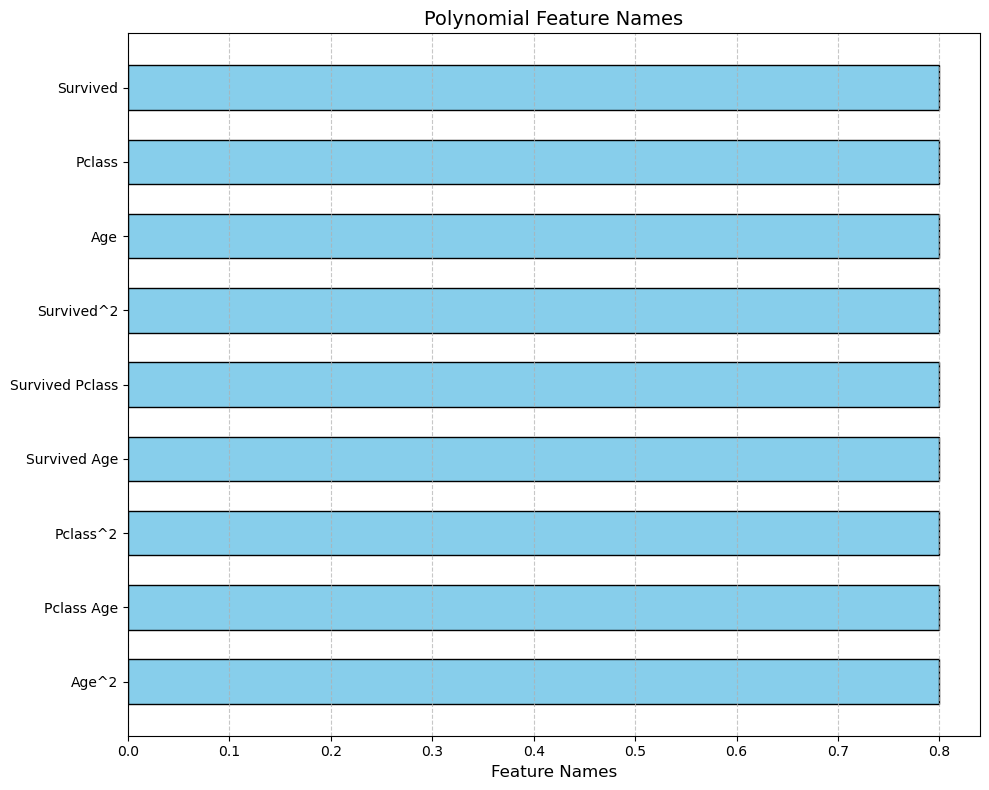

In [168]:
plt.figure(figsize=(10, 8))
plt.barh(range(len(poly_feature_names)), width=0.8, height=0.6, align='center', color='skyblue', edgecolor='black')
plt.yticks(range(len(poly_feature_names)), poly_feature_names, fontsize=10)
plt.xlabel('Feature Names', fontsize=12)
plt.title('Polynomial Feature Names', fontsize=14)
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [197]:
X = titanic_df.drop('Survived', axis=1)  
y = titanic_df['Survived']  

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [199]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [201]:
# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [202]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [203]:
# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [204]:
# Full pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Fit the pipeline (including preprocessing) to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

###  Model Training and Evaluation

In [205]:
y_pred = pipeline.predict(X_test)

In [206]:
accuracy_score(y_test, y_pred)

0.8044692737430168

In [207]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.89      0.84       105\n           1       0.81      0.69      0.74        74\n\n    accuracy                           0.80       179\n   macro avg       0.81      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'

In [208]:
confusion_matrix(y_test, y_pred)

array([[93, 12],
       [23, 51]], dtype=int64)

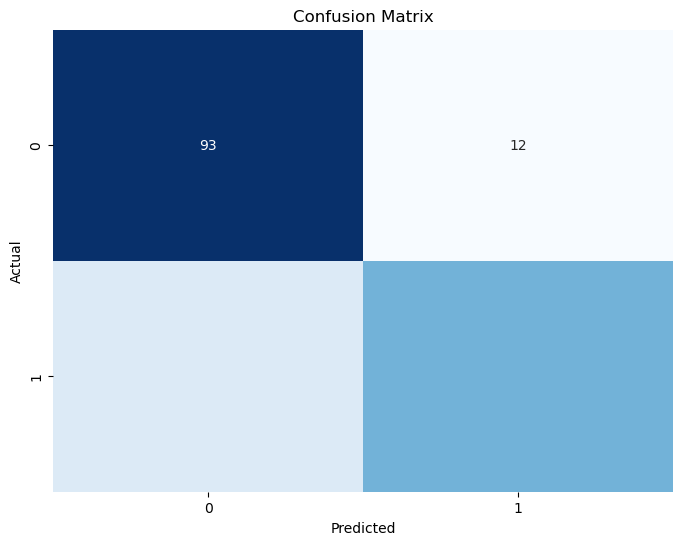

In [209]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




---

# Observational Summary

## Introduchello guys i am ruby poddar so...the titanic.. Poddar, this analysis explores the Titanic dataset to predict passenger survival using advanced machine learning techniques. The project aims to uncover insights from historical data and demonstrate the predictive power of data-driven models.

## Dataset Overview

The Titanic dataset encompasses various passenger attributes:
- **PassengerId**: Unique identifier
- **Pclass**: Ticket class (1st, 2nd, 3rd)
- **Name**: Passenger's name
- **Sex**: Gender of the passenger
- **Age**: Age of the passenger
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- **Survived**: Survival status (0 = No, 1 = Yes)

## Data Exploration and Preprocessing

### Data Cleaning
- Addressed missing values through imputation or removal based on data relevance.
- Dropped irrelevant columns to focus on predictive features.

### Feature Engineering
- Extracted titles (e.g., Mr., Mrs.) from names to capture socio-economic status.
- Engineered new features to reveal insights into survival patterns.

### Exploratory Data Analysis (EDA)
- Visualized data distributions and correlations using matplotlib and seaborn.
- Identified trends and relationships through histograms, scatter plots, and correlation matrices.

## Model Training and Evaluation Workflow

### Data Preprocessing
- Standardized numerical features using StandardScaler from scikit-learn and numpy.
- Encoded categorical variables using OneHotEncoder from scikit-learn.
- Handled missing data with SimpleImputer from scikit-learn.

### Model Selection and Training
- Selected RandomForestClassifier from scikit-learn for its robustness and interpretability.
- Trained the model on preprocessed data to predict survival outcomes.

### Model Evaluation
- Evaluated model performance using accuracy, precision, recall, and confusion matrix metrics from scikit-learn.
- Optimized model parameters with GridSearchCV from scikit-learn to enhance predictive accuracy.

## Results Interpretation

### Feature Importance
- Analyzed influential features (e.g., age, gender, ticket class) on survival predictions.
- Leveraged insights to refine model features and improve predictive outcomes.

### Model Comparison
- Compared model performance across different methodologies (if applicable) to highlight strengths and weaknesses.
- Informed decision-making on model selection and optimization strategies.

## Conclusion

### Summary
- Summarized key findings, emphasizing critical factors influencing passenger survival predictions.

### Recommendations
- Provided actionable insights for refining model accuracy or exploring additional datasets.
- Guided future research directions in predictive modeling and historical analysis.

### Future Work
- Identified opportunities for integrating advanced modeling techniques or expanding dataset scope.
- Planned further refinement of models and insights for deeper historical understanding.

## References and Acknowledgments

### Data Source Citation
- Properly cited the source of the Titanic dataset to ensure transparency and ethical data use.

### Tools and Libraries
- Utilized Jupyter Notebook for interactive data analysis and visualization.
- Employed pandas, numpy, and matplotlib,seaborn for data manipulation, exploration, and visualization.
- Utilized scikit-learn for machine learning modeling, including preprocessing, model selection, and evaluation.

### Author
- **Author**: Ruby Poddar

---

